In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


Model Accuracies:
Logistic Regression: 0.97
Decision Tree: 0.93
Random Forest: 0.93
SVM: 0.97


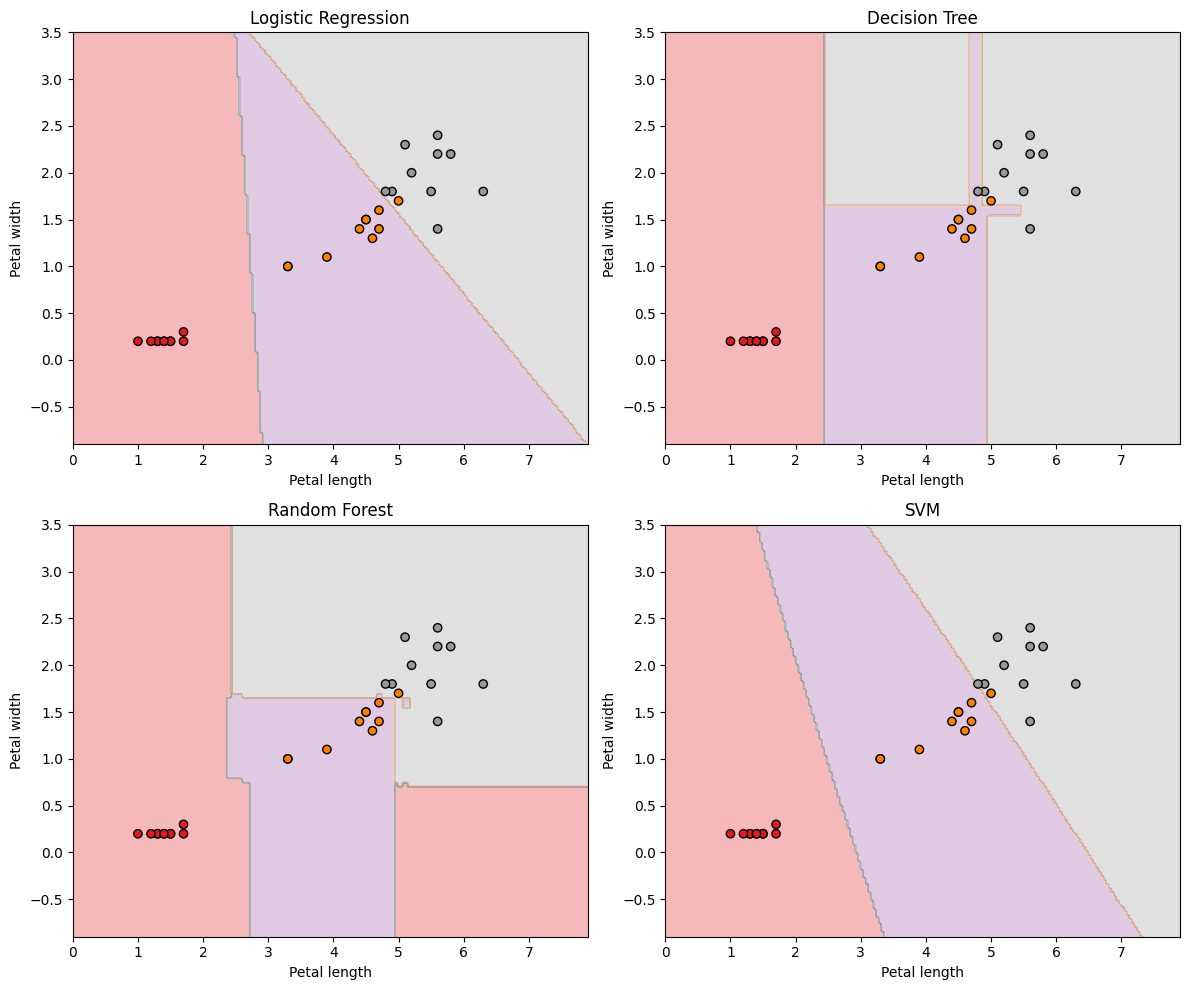

In [ ]:
# Iris Flower Classification with Multiple Models

# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# 2. Load Dataset

iris = pd.read_csv("IRIS.csv")  # make sure IRIS.csv is in the same folder

# Features & Target
X = iris.drop("species", axis=1)
y = iris["species"]

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


# 3. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


# 4. Define Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}


# 5. Train & Evaluate Models

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

print("Model Accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.2f}")


# 6. Visualization (Decision Boundaries)
# Use only two features for visualization
X_vis = iris[["petal_length", "petal_width"]].values
y_vis = encoder.fit_transform(iris["species"])

# Train-test split (again for visualization)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis
)

# Models for visualization
models_vis = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Meshgrid for plotting
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Plot decision boundaries
plt.figure(figsize=(12, 10))

for i, (name, model) in enumerate(models_vis.items(), 1):
    model.fit(X_train_vis, y_train_vis)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1],
                c=y_test_vis, cmap=plt.cm.Set1, edgecolor="k")
    plt.title(name)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")

plt.tight_layout()
plt.show()
